<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Phân tích dữ liệu điểm thi THPTQG 2022 và 2023<Title>
</div>

### Import thư viện

In [1]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.subplots as sp

warnings.filterwarnings("ignore")

### Đường dẫn

In [2]:
path_raw_2022='./raw/2022.csv'
path_raw_2023='./raw/2023.csv'
path_processed='./processed'
path_img='./img'

### Đọc dữ liệu

In [3]:
df_2022=pd.read_csv(path_raw_2022)
print(df_2022.shape)
print(df_2022.dtypes)
df_2022.head()

(995441, 10)
sbd            int64
toan         float64
ngu_van      float64
ngoai_ngu    float64
vat_li       float64
hoa_hoc      float64
sinh_hoc     float64
lich_su      float64
dia_li       float64
gdcd         float64
dtype: object


,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25


In [4]:
df_2023=pd.read_csv(path_raw_2023)
print(df_2023.shape)
print(df_2023.dtypes)
df_2023.head()

(1022060, 11)
sbd               int64
toan            float64
ngu_van         float64
ngoai_ngu       float64
vat_li          float64
hoa_hoc         float64
sinh_hoc        float64
lich_su         float64
dia_li          float64
gdcd            float64
ma_ngoai_ngu     object
dtype: object


,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,8.50,9.2,NaN,NaN,NaN,6.75,6.00,9.00,N1
1,1000002,7.2,8.50,9.2,NaN,NaN,NaN,8.75,6.50,8.50,N1
2,1000003,NaN,6.50,NaN,NaN,NaN,NaN,9.25,7.50,NaN,NaN
3,1000004,7.8,8.25,7.8,NaN,NaN,NaN,4.50,6.25,8.25,N1
4,1000005,7.2,8.00,7.8,NaN,NaN,NaN,4.75,6.75,8.25,N1


Xóa `ma_ngoai_ngu`

In [5]:
df_2023.drop(columns=['ma_ngoai_ngu'], inplace=True)
df_2023.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,8.4,8.50,9.2,NaN,NaN,NaN,6.75,6.00,9.00
1,1000002,7.2,8.50,9.2,NaN,NaN,NaN,8.75,6.50,8.50
2,1000003,NaN,6.50,NaN,NaN,NaN,NaN,9.25,7.50,NaN
3,1000004,7.8,8.25,7.8,NaN,NaN,NaN,4.50,6.25,8.25
4,1000005,7.2,8.00,7.8,NaN,NaN,NaN,4.75,6.75,8.25


### Thống kê cơ bản về dữ liệu

In [6]:
stats_2022 = df_2022.describe()
stats_2022

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
count,9.954410e+05,982726.000000,981407.000000,870609.000000,325523.000000,327367.000000,322198.000000,659662.000000,657421.000000,554343.000000
mean,2.759692e+07,6.466254,6.507746,5.157686,6.723779,6.703898,5.019109,6.343930,6.677929,8.033266
std,1.917092e+07,1.675435,1.379602,1.949547,1.441925,1.600393,1.448270,1.612879,1.215013,1.067272
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000217e+07,5.400000,5.580000,3.600000,5.750000,5.500000,4.000000,5.250000,5.750000,7.500000
50%,2.801886e+07,6.800000,6.500000,4.800000,7.000000,7.000000,4.750000,6.500000,6.750000,8.250000
75%,4.400582e+07,7.800000,7.500000,6.600000,7.750000,8.000000,6.000000,7.500000,7.500000,8.750000
max,6.400659e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [7]:
stats_2023=df_2023.describe()
stats_2023

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
count,1.022060e+06,1.003373e+06,1.008239e+06,880997.000000,327189.000000,328118.000000,324625.000000,683447.000000,682134.000000,565452.000000
mean,2.753863e+07,6.250557e+00,6.858194e+00,5.462410,6.573900,6.744646,6.394933,6.025629,6.147523,8.285805
std,1.915578e+07,1.633336e+00,1.326471e+00,1.966353,1.486819,1.428468,1.206772,1.552931,1.168732,1.137638
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000129e+07,5.200000e+00,6.000000e+00,4.000000,5.500000,5.750000,5.500000,5.000000,5.500000,7.750000
50%,2.801558e+07,6.600000e+00,7.000000e+00,5.200000,6.750000,7.000000,6.500000,6.000000,6.250000,8.500000
75%,4.400621e+07,7.600000e+00,7.750000e+00,7.000000,7.750000,7.750000,7.250000,7.250000,7.000000,9.250000
max,6.400694e+07,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
# Chuyển đổi dữ liệu sang định dạng long format
stats_2022_long = stats_2022.melt(var_name='Subject', value_name='Value', ignore_index=False).reset_index()
stats_2023_long = stats_2023.melt(var_name='Subject', value_name='Value', ignore_index=False).reset_index()

# Thêm cột Year để chỉ ra năm tương ứng
stats_2022_long['Year'] = 2022
stats_2023_long['Year'] = 2023

# Gộp dữ liệu của hai năm
stats_combined_long = pd.concat([stats_2022_long, stats_2023_long], axis=0)

# Sắp xếp lại các cột
stats_combined_long = stats_combined_long[['Year', 'index', 'Subject', 'Value']]

# Đổi tên cột cho dễ hiểu
stats_combined_long.columns = ['Year', 'Statistic', 'Subject', 'Value']

# Lưu kết quả vào file CSV
stats_combined_long.to_csv(path_processed + '/statistics_summary_long_format.csv', index=False)

In [31]:
# Danh sách các môn học
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

# Tạo map cho tên môn học tiếng Việt có dấu
subject_map = {
    'toan': 'Toán',
    'ngu_van': 'Ngữ văn',
    'ngoai_ngu': 'Ngoại ngữ',
    'vat_li': 'Vật lí',
    'hoa_hoc': 'Hóa học',
    'sinh_hoc': 'Sinh học',
    'lich_su': 'Lịch sử',
    'dia_li': 'Địa lí',
    'gdcd': 'GDCD'
}

### Phổ điểm các môn

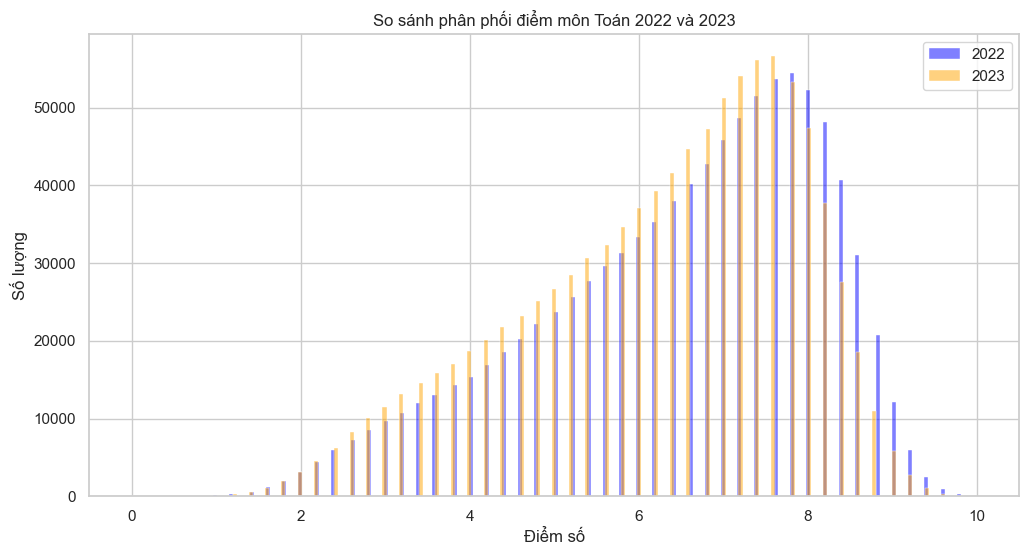

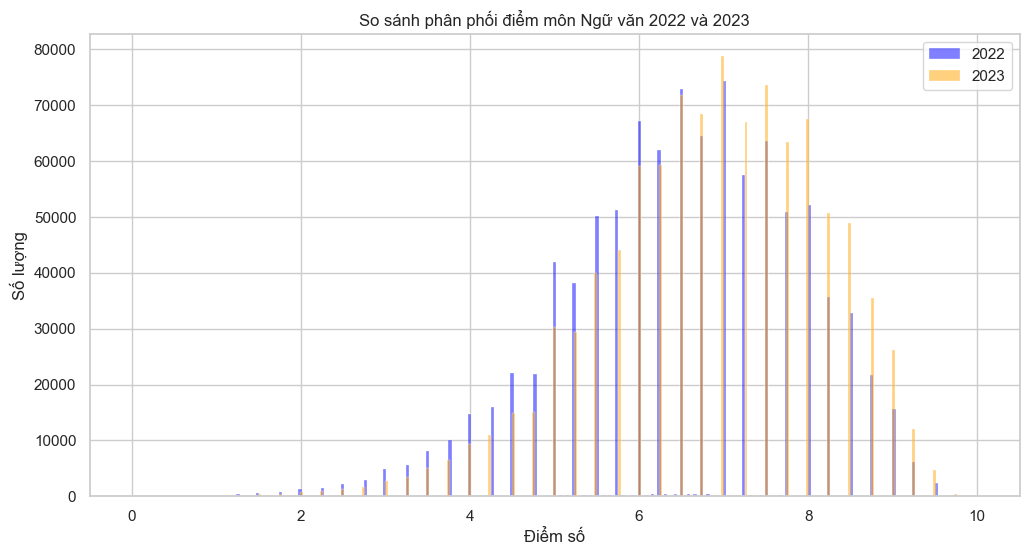

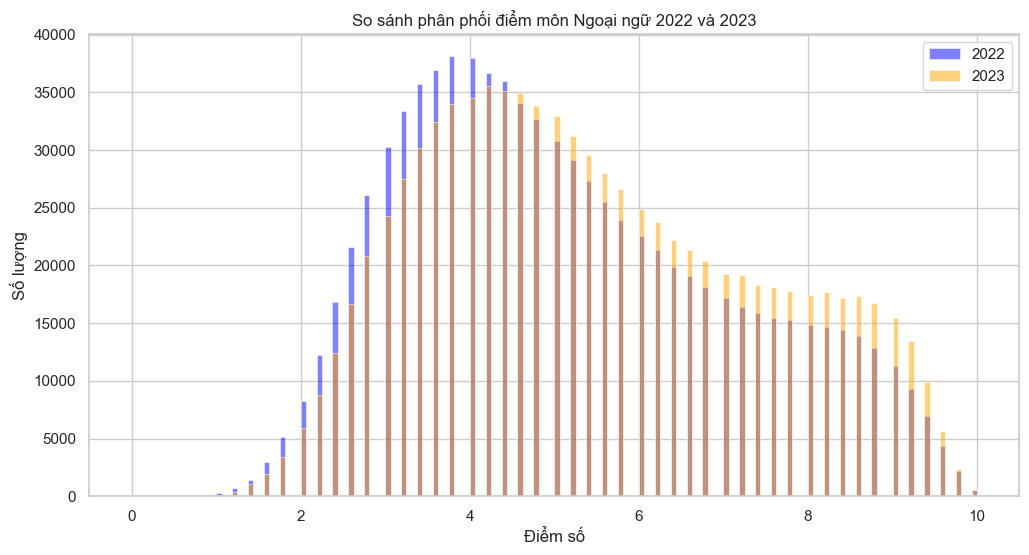

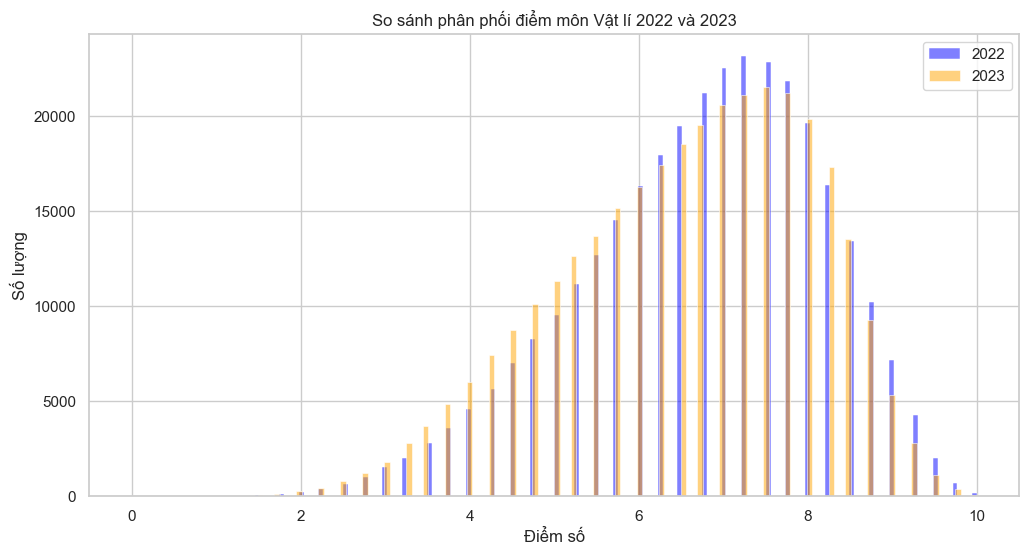

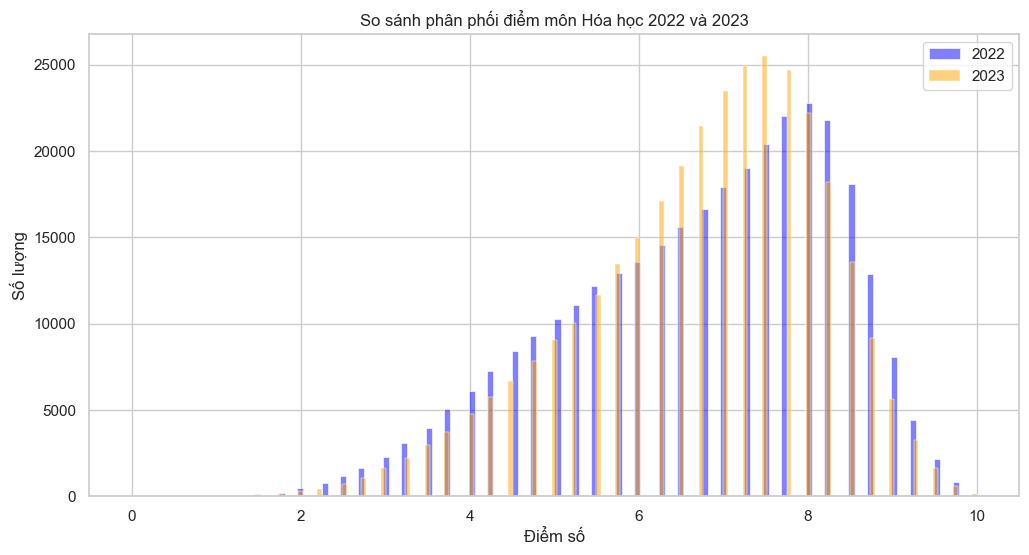

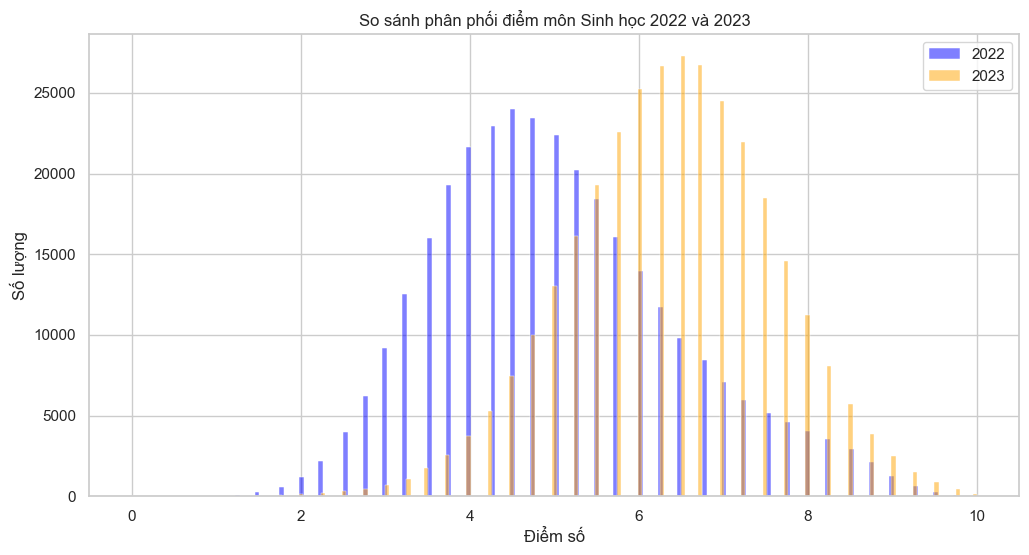

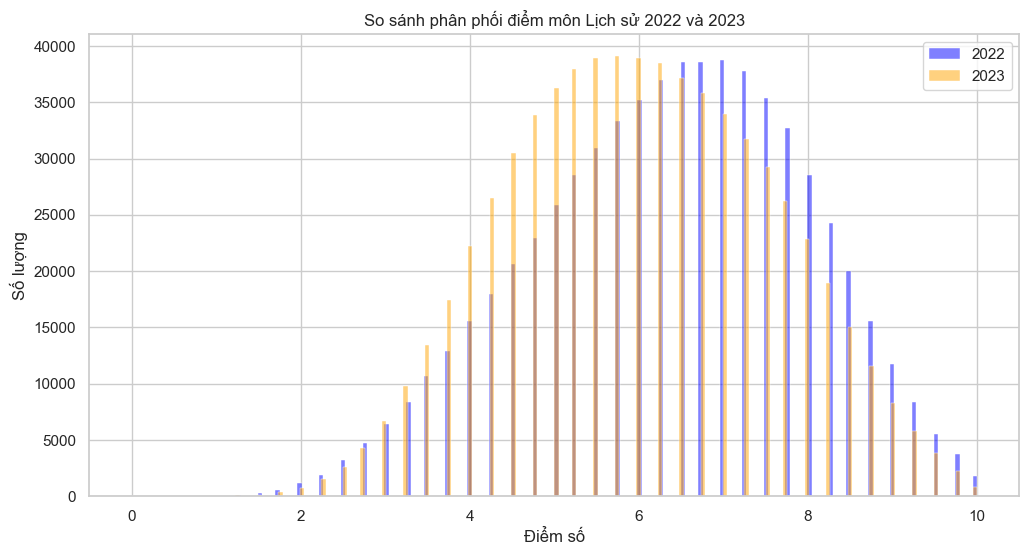

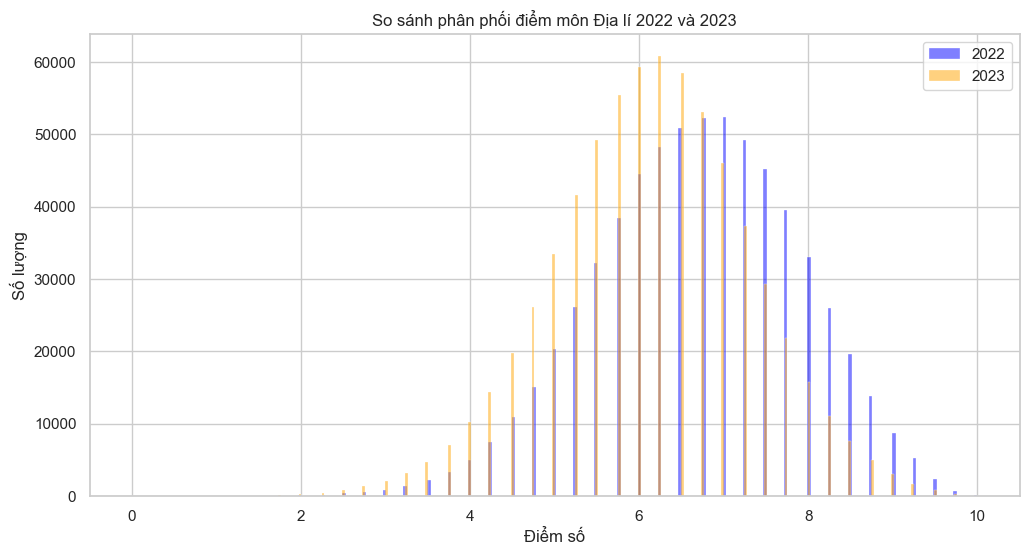

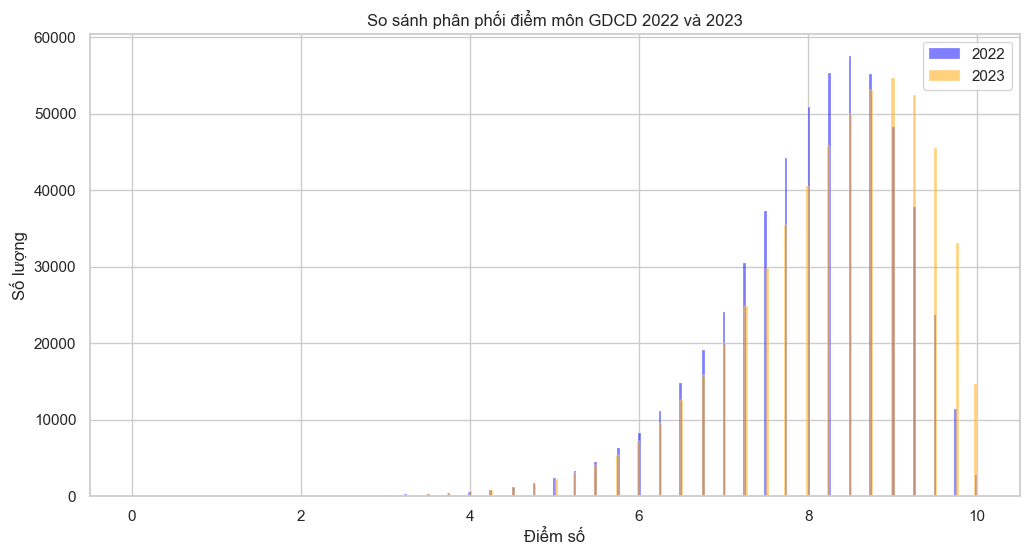

In [32]:
# Vẽ biểu đồ phân phối điểm cho từng môn với màu sắc và độ trong suốt khác nhau
sns.set_theme(style="whitegrid")

for subject in subjects:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_2022[subject], color='blue', label='2022', stat="count", alpha=0.5)
    sns.histplot(df_2023[subject], color='orange', label='2023', stat="count", alpha=0.5)
    plt.title(f'So sánh phân phối điểm môn {subject_map[subject]} 2022 và 2023')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.legend()
    plt.savefig(f'{path_img}/distribution_{subject}.png')
    plt.show()

In [41]:
# In ra những thí sinh có điểm môn Ngữ văn không tròn 0.25 và khác NaN
df_2022_ngu_van = df_2022[df_2022['ngu_van'] % 0.25 != 0]
df_2022_ngu_van = df_2022_ngu_van[~df_2022_ngu_van['ngu_van'].isnull()]
df_2022_ngu_van.shape
df_2022_ngu_van.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,...,hoa_hoc_group,sinh_hoc_group,lich_su_group,dia_li_group,gdcd_group,A00_group,A01_group,B00_group,C00_group,D01_group
186,1000190,5.4,5.17,NaN,NaN,NaN,NaN,7.50,5.50,7.50,...,NaN,NaN,Cao,Thấp,Thấp,NaN,NaN,NaN,Trung bình,NaN
279,1000283,7.8,6.67,4.0,NaN,NaN,NaN,4.75,6.75,7.00,...,NaN,NaN,Thấp,Trung bình,Thấp,NaN,NaN,NaN,Trung bình,Trung bình
502,1000515,NaN,4.67,NaN,NaN,NaN,NaN,9.00,6.50,NaN,...,NaN,NaN,Cao,Trung bình,NaN,NaN,NaN,NaN,Trung bình,NaN
631,1000647,6.2,6.83,7.0,NaN,NaN,NaN,6.00,6.50,7.50,...,NaN,NaN,Trung bình,Trung bình,Thấp,NaN,NaN,NaN,Trung bình,Trung bình
661,1000677,7.4,6.67,8.4,NaN,NaN,NaN,7.25,8.25,7.75,...,NaN,NaN,Trung bình,Cao,Thấp,NaN,NaN,NaN,Cao,Cao


In [42]:
# In ra những thí sinh có điểm môn Ngữ văn không tròn 0.25 và khác NaN
df_2023_ngu_van = df_2023[df_2023['ngu_van'] % 0.25 != 0]
df_2023_ngu_van = df_2023_ngu_van[~df_2023_ngu_van['ngu_van'].isnull()]
df_2023_ngu_van.shape
df_2023_ngu_van.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,...,hoa_hoc_group,sinh_hoc_group,lich_su_group,dia_li_group,gdcd_group,A00_group,A01_group,B00_group,C00_group,D01_group
3697,1003698,3.8,6.16,NaN,NaN,NaN,NaN,7.25,5.50,NaN,...,NaN,NaN,Cao,Thấp,NaN,NaN,NaN,NaN,Trung bình,NaN
3718,1003719,NaN,6.16,NaN,NaN,NaN,NaN,6.00,7.25,NaN,...,NaN,NaN,Trung bình,Cao,NaN,NaN,NaN,NaN,Trung bình,NaN
3773,1003774,8.0,5.42,7.4,8.75,4.25,5.0,NaN,NaN,NaN,...,Thấp,Thấp,NaN,NaN,NaN,Trung bình,Cao,Thấp,NaN,Cao
3938,1003939,6.6,5.33,9.2,7.25,5.25,6.0,NaN,NaN,NaN,...,Thấp,Thấp,NaN,NaN,NaN,Thấp,Cao,Thấp,NaN,Cao
4284,1004285,6.8,7.58,7.4,NaN,NaN,NaN,3.75,5.25,6.5,...,NaN,NaN,Thấp,Thấp,Thấp,NaN,NaN,NaN,Thấp,Cao


In [45]:
# Thay thế các giá trị không tròn 0.25 bằng giá trị tròn 0.25 gần nhất nếu không phải NaN
df_2022['ngu_van'] = df_2022['ngu_van'].apply(lambda x: round(x * 4) / 4 if not np.isnan(x) else x)
df_2023['ngu_van'] = df_2023['ngu_van'].apply(lambda x: round(x * 4) / 4 if not np.isnan(x) else x)

In [46]:
# In ra những thí sinh có điểm môn Ngữ văn không tròn 0.25 và khác NaN
df_2022_ngu_van = df_2022[df_2022['ngu_van'] % 0.25 != 0]
df_2022_ngu_van = df_2022_ngu_van[~df_2022_ngu_van['ngu_van'].isnull()]
df_2022_ngu_van.shape
df_2022_ngu_van.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,...,hoa_hoc_group,sinh_hoc_group,lich_su_group,dia_li_group,gdcd_group,A00_group,A01_group,B00_group,C00_group,D01_group


In [47]:
# In ra những thí sinh có điểm môn Ngữ văn không tròn 0.25 và khác NaN
df_2023_ngu_van = df_2023[df_2023['ngu_van'] % 0.25 != 0]
df_2023_ngu_van = df_2023_ngu_van[~df_2023_ngu_van['ngu_van'].isnull()]
df_2023_ngu_van.shape
df_2023_ngu_van.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,...,hoa_hoc_group,sinh_hoc_group,lich_su_group,dia_li_group,gdcd_group,A00_group,A01_group,B00_group,C00_group,D01_group


In [49]:
# Bản đồ mã tỉnh thành (Chỉ viết hoa chữ cái đầu)
province_map = {
    '01': 'Thành phố Hà Nội', '02': 'Thành phố Hồ Chí Minh', '03': 'Thành phố Hải Phòng',
    '04': 'Thành phố Đà Nẵng', '05': 'Tỉnh Hà Giang', '06': 'Tỉnh Cao Bằng', '07': 'Tỉnh Lai Châu',
    '08': 'Tỉnh Lào Cai', '09': 'Tỉnh Tuyên Quang', '10': 'Tỉnh Lạng Sơn', '11': 'Tỉnh Bắc Kạn',
    '12': 'Tỉnh Thái Nguyên', '13': 'Tỉnh Yên Bái', '14': 'Tỉnh Sơn La', '15': 'Tỉnh Phú Thọ',
    '16': 'Tỉnh Vĩnh Phúc', '17': 'Tỉnh Quảng Ninh', '18': 'Tỉnh Bắc Giang', '19': 'Tỉnh Bắc Ninh',
    '21': 'Tỉnh Hải Dương', '22': 'Tỉnh Hưng Yên', '23': 'Tỉnh Hòa Bình', '24': 'Tỉnh Hà Nam',
    '25': 'Tỉnh Nam Định', '26': 'Tỉnh Thái Bình', '27': 'Tỉnh Ninh Bình', '28': 'Tỉnh Thanh Hóa',
    '29': 'Tỉnh Nghệ An', '30': 'Tỉnh Hà Tĩnh', '31': 'Tỉnh Quảng Bình', '32': 'Tỉnh Quảng Trị',
    '33': 'Tỉnh Thừa Thiên - Huế', '34': 'Tỉnh Quảng Nam', '35': 'Tỉnh Quảng Ngãi', '36': 'Tỉnh Kon Tum',
    '37': 'Tỉnh Bình Định', '38': 'Tỉnh Gia Lai', '39': 'Tỉnh Phú Yên', '40': 'Tỉnh Đắk Lắk',
    '41': 'Tỉnh Khánh Hòa', '42': 'Tỉnh Lâm Đồng', '43': 'Tỉnh Bình Phước', '44': 'Tỉnh Bình Dương',
    '45': 'Tỉnh Ninh Thuận', '46': 'Tỉnh Tây Ninh', '47': 'Tỉnh Bình Thuận', '48': 'Tỉnh Đồng Nai',
    '49': 'Tỉnh Long An', '50': 'Tỉnh Đồng Tháp', '51': 'Tỉnh An Giang', '52': 'Tỉnh Bà Rịa – Vũng Tàu',
    '53': 'Tỉnh Tiền Giang', '54': 'Tỉnh Kiên Giang', '55': 'Thành phố Cần Thơ', '56': 'Tỉnh Bến Tre',
    '57': 'Tỉnh Vĩnh Long', '58': 'Tỉnh Trà Vinh', '59': 'Tỉnh Sóc Trăng', '60': 'Tỉnh Bạc Liêu',
    '61': 'Tỉnh Cà Mau', '62': 'Tỉnh Điện Biên', '63': 'Tỉnh Đăk Nông', '64': 'Tỉnh Hậu Giang'
}

In [56]:
# Thêm cột 'Province' vào dataframe dựa trên sbd
def add_province_column(df):
    df['sbd'] = df['sbd'].astype(str).str.zfill(8)  # Đảm bảo cột 'sbd' là chuỗi và có độ dài 8 ký tự
    df['Province'] = df['sbd'].str[:2].map(province_map)
    return df

# Cập nhật dataframe
df_2022 = add_province_column(df_2022)
df_2023 = add_province_column(df_2023)

In [57]:
# Hàm để tính tần suất xuất hiện của từng điểm số theo từng tỉnh thành
def calculate_frequency(df, year):
    freq_df_list = []
    subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
    for subject in subjects:
        for province in df['Province'].unique():
            province_df = df[df['Province'] == province]
            freq = province_df[subject].value_counts().reset_index()
            freq.columns = ['Score', 'Frequency']
            freq['Year'] = year
            freq['Subject'] = subject_map[subject]
            freq['Province'] = province
            freq_df_list.append(freq)
    return pd.concat(freq_df_list)

# Tính tần suất xuất hiện của từng điểm số cho mỗi môn thi theo từng tỉnh thành
freq_2022 = calculate_frequency(df_2022, 2022)
freq_2023 = calculate_frequency(df_2023, 2023)

# Gộp dữ liệu của hai năm
freq_combined = pd.concat([freq_2022, freq_2023])

# Sắp xếp lại các cột
freq_combined = freq_combined[['Year', 'Province', 'Subject', 'Score', 'Frequency']]

# Sắp xếp dữ liệu theo năm, tỉnh thành và môn thi
freq_combined = freq_combined.sort_values(['Year', 'Province', 'Subject', 'Score'], ascending=[True, True, True, True])

# Lưu kết quả vào file XLSX
freq_combined.to_excel(path_processed + '/score_frequencies.xlsx', index=False, engine='openpyxl')


### Phổ điểm các tổ hợp môn

In [58]:
# Định nghĩa các tổ hợp môn thi
combinations = {
    'A00': ['toan', 'vat_li', 'hoa_hoc'],
    'A01': ['toan', 'vat_li', 'ngoai_ngu'],
    'B00': ['toan', 'hoa_hoc', 'sinh_hoc'],
    'C00': ['ngu_van', 'lich_su', 'dia_li'],
    'D01': ['toan', 'ngu_van', 'ngoai_ngu']
}

In [59]:
# Hàm để tính tổng điểm cho từng tổ hợp môn
def calculate_combination_scores(df, combinations):
    for combo, subjects in combinations.items():
        # Loại bỏ các hàng có NaN trong các môn trong tổ hợp
        mask = df[subjects].notna().all(axis=1)
        df.loc[mask, combo] = df.loc[mask, subjects].sum(axis=1)
    return df


In [60]:
# Tính tổng điểm cho từng tổ hợp môn
df_2022 = calculate_combination_scores(df_2022, combinations)
df_2023 = calculate_combination_scores(df_2023, combinations)

In [72]:
df_2022[['sbd', 'A00', 'A01', 'B00', 'C00', 'D01']].sample(5)

,sbd,A00,A01,B00,C00,D01
544098,29027764,23.45,NaN,19.45,NaN,NaN
12253,01012378,27.20,20.75,22.70,NaN,15.50
2772,01002801,NaN,NaN,NaN,23.50,22.85
138627,02041773,24.15,22.55,21.40,NaN,21.30
129620,02032750,NaN,NaN,NaN,18.75,17.00


In [73]:
df_2023[['sbd', 'A00', 'A01', 'B00', 'C00', 'D01']].sample(5)

,sbd,A00,A01,B00,C00,D01
487900,27003600,NaN,NaN,NaN,14.75,10.55
247400,09001563,NaN,NaN,NaN,20.50,14.35
898040,52009802,NaN,NaN,NaN,19.50,19.50
496933,28001484,NaN,NaN,NaN,NaN,NaN
915492,53014329,NaN,NaN,NaN,24.00,18.55


In [74]:
# Hàm để tính tần suất xuất hiện của từng tổng điểm theo từng tỉnh thành và tổ hợp môn
def calculate_frequency(df, year, combinations):
    freq_df_list = []
    for combo, subjects in combinations.items():
        for province in df['Province'].unique():
            province_df = df[df['Province'] == province]
            freq = province_df[combo].value_counts().reset_index()
            freq.columns = ['Score', 'Frequency']
            freq['Year'] = year
            freq['Combination'] = combo
            freq['Province'] = province
            freq_df_list.append(freq)
    return pd.concat(freq_df_list)

In [75]:
freq_2022 = calculate_frequency(df_2022, 2022, combinations)
freq_2023 = calculate_frequency(df_2023, 2023, combinations)

# Gộp dữ liệu của hai năm
freq_combined = pd.concat([freq_2022, freq_2023])

# Sắp xếp lại các cột
freq_combined = freq_combined[['Year', 'Province', 'Combination', 'Score', 'Frequency']]

# Sắp xếp theo năm, mã tổ hợp, tỉnh thành và điểm tăng dần
freq_combined = freq_combined.sort_values(by=['Year', 'Province', 'Combination', 'Score'], ascending=[True, True, True, True])

In [76]:
# Lưu kết quả vào file XLXS
freq_combined.to_excel(path_processed + '/combination_score_frequencies.xlsx', index=False, engine='openpyxl')

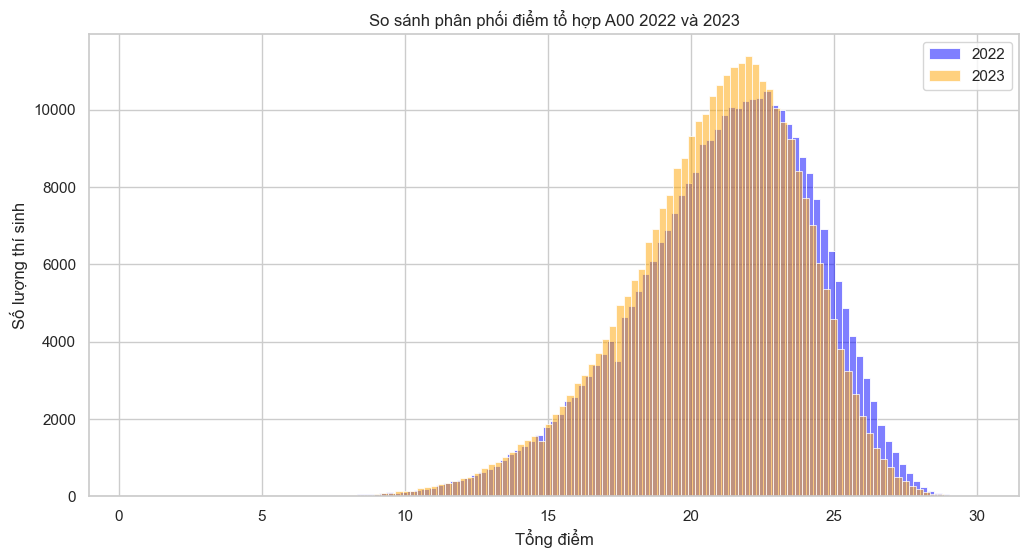

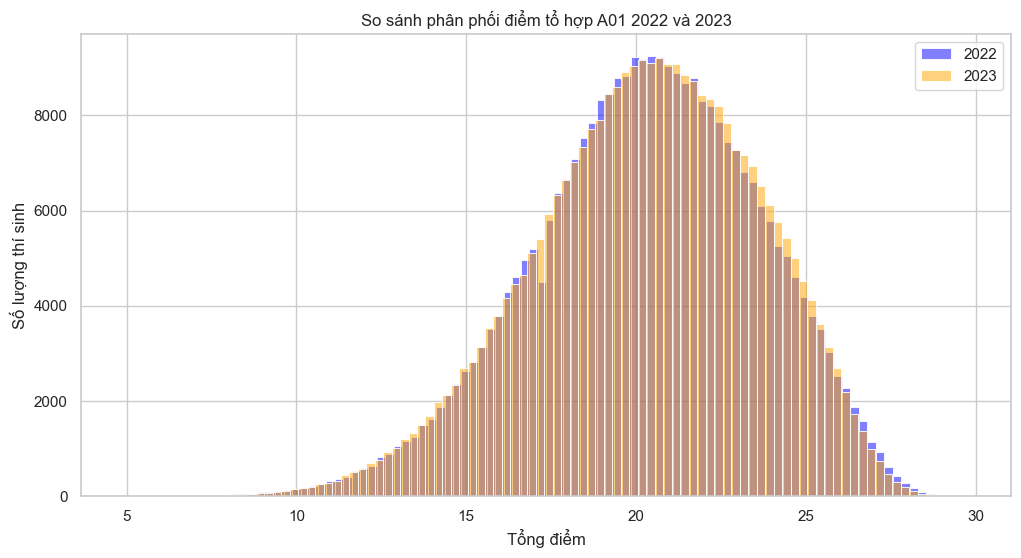

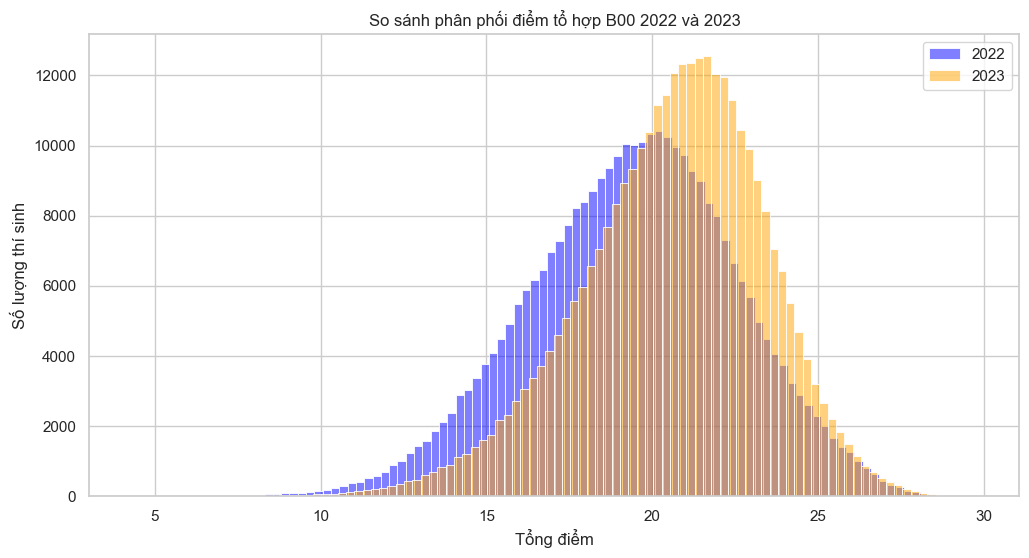

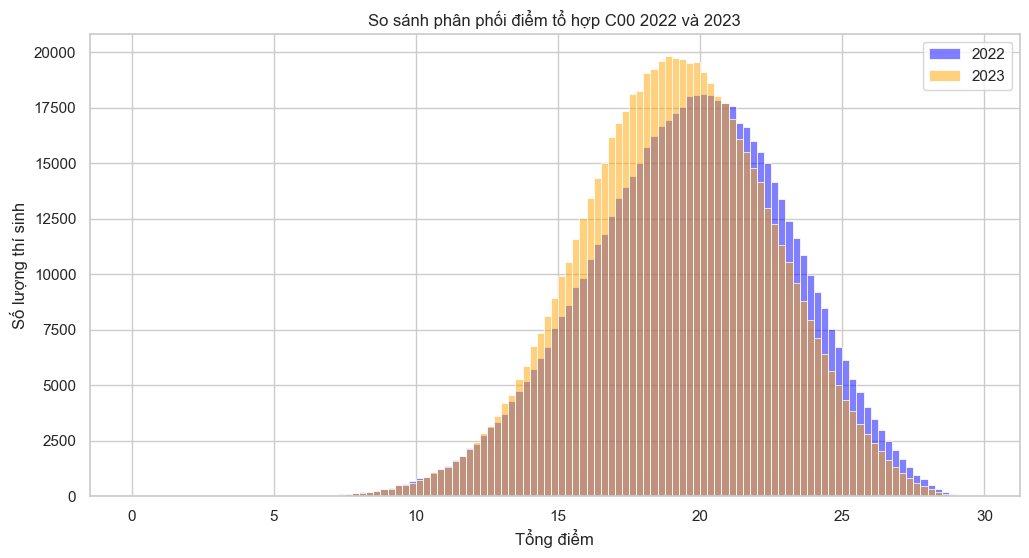

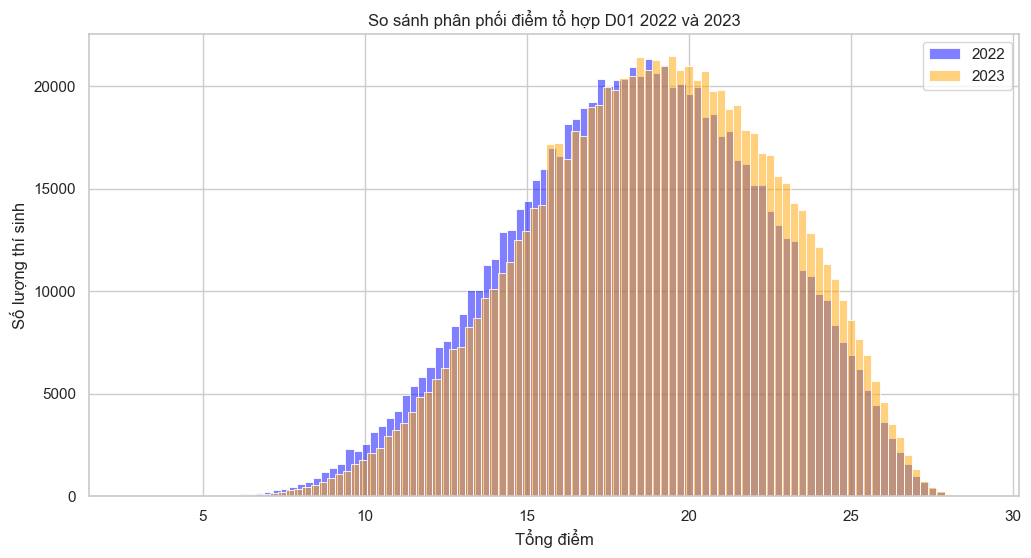

In [77]:
# Vẽ biểu đồ phân phối điểm cho từng tổ hợp môn
sns.set_theme(style="whitegrid")
for combo in combinations.keys():
    plt.figure(figsize=(12, 6))
    sns.histplot(df_2022[combo], color='blue', label='2022', stat="count", alpha=0.5, binwidth=0.25)
    sns.histplot(df_2023[combo], color='orange', label='2023', stat="count", alpha=0.5, binwidth=0.25)
    plt.title(f'So sánh phân phối điểm tổ hợp {combo} 2022 và 2023')
    plt.xlabel('Tổng điểm')
    plt.ylabel('Số lượng thí sinh')
    plt.legend()
    plt.savefig(f'{path_img}/distribution_{combo}.png')
    plt.show()

### Phân tích tương quan giữa các môn thi

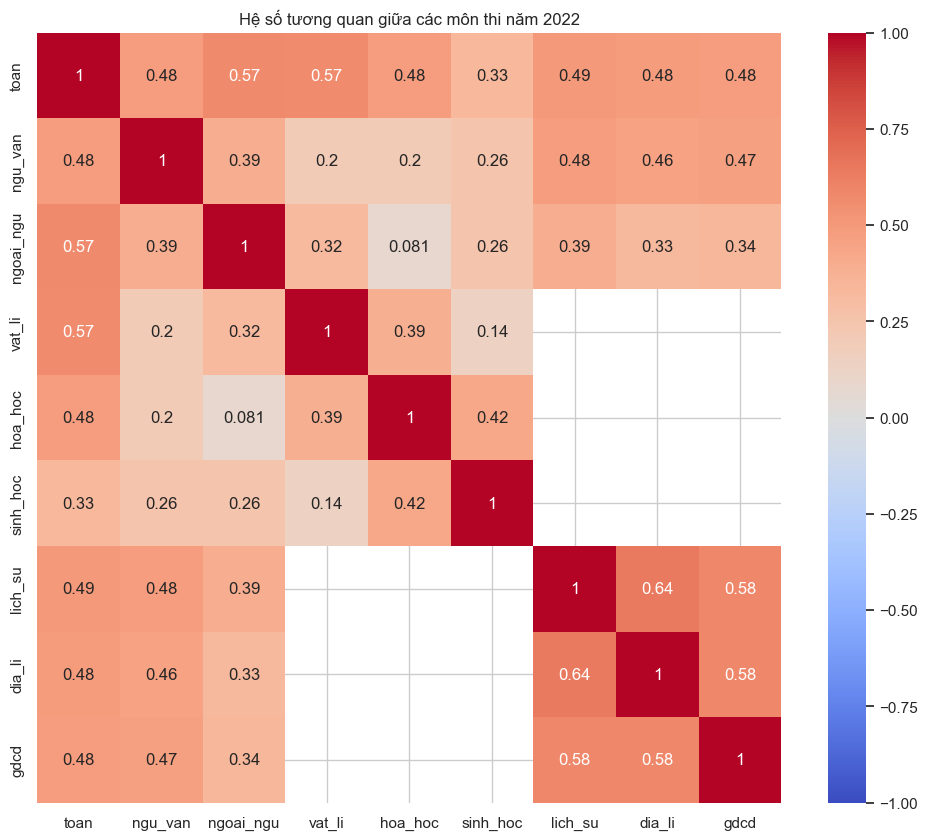

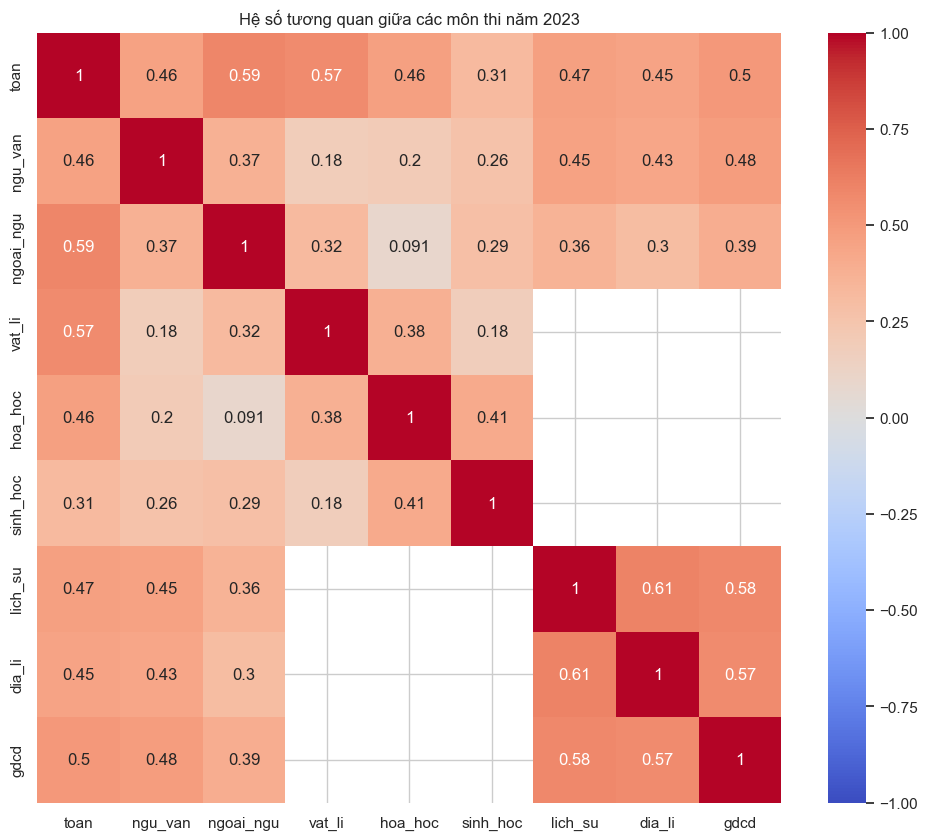

In [22]:
selected_columns = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

corr_2022 = df_2022[selected_columns].corr()
corr_2023 = df_2023[selected_columns].corr()

# Vẽ biểu đồ heatmap cho hệ số tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(corr_2022, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Hệ số tương quan giữa các môn thi năm 2022')
plt.savefig(path_img + '/correlation_heatmap_2022.png')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_2023, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Hệ số tương quan giữa các môn thi năm 2023')
plt.savefig(path_img + '/correlation_heatmap_2023.png')
plt.show()

### So sánh phân phối điểm theo các nhóm (cao, trung bình, thấp)

In [23]:
def categorize_scores(df):
    subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
    for subject in subjects:
        df[f'{subject}_group'] = pd.qcut(df[subject], 3, labels=['Thấp', 'Trung bình', 'Cao'])
    return df

df_2022 = categorize_scores(df_2022)
df_2023 = categorize_scores(df_2023)

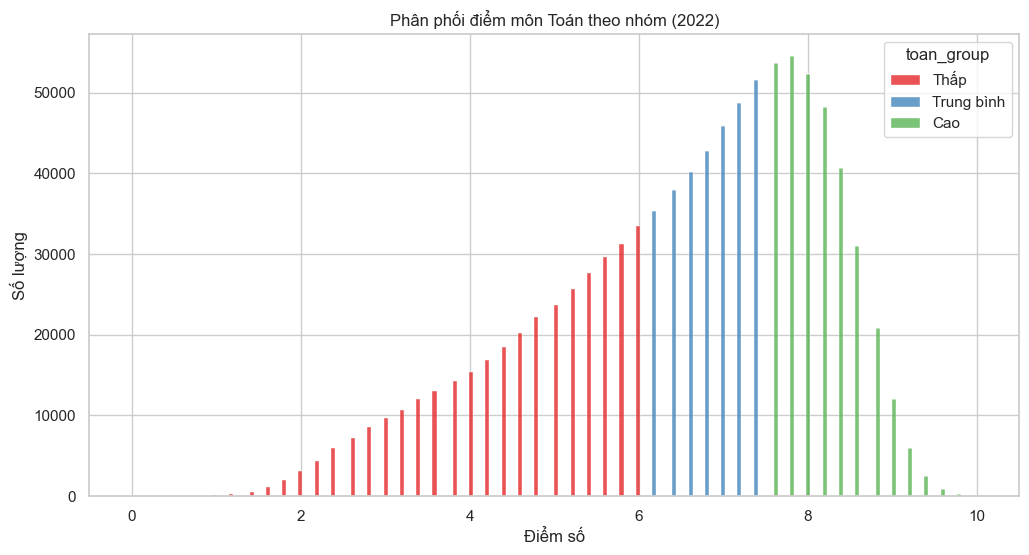

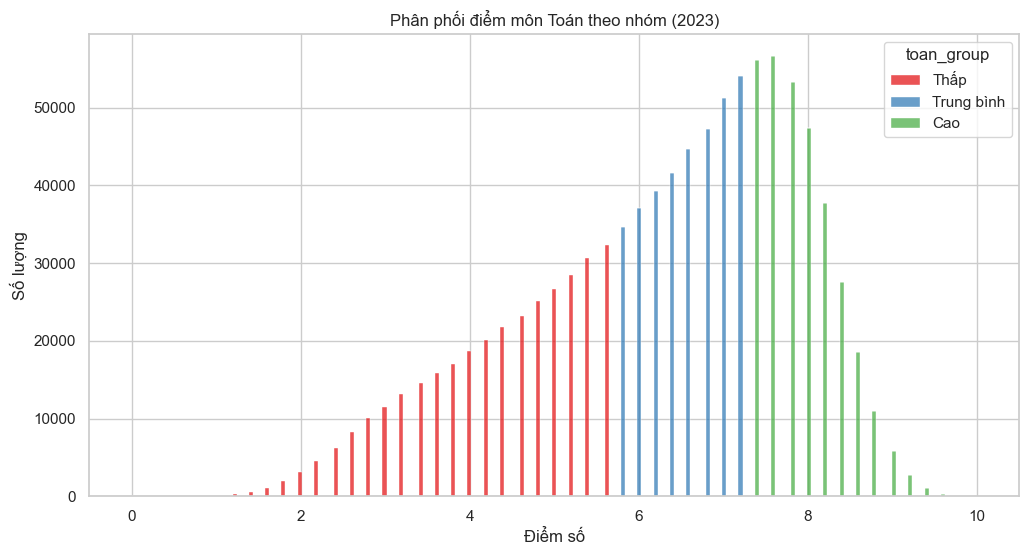

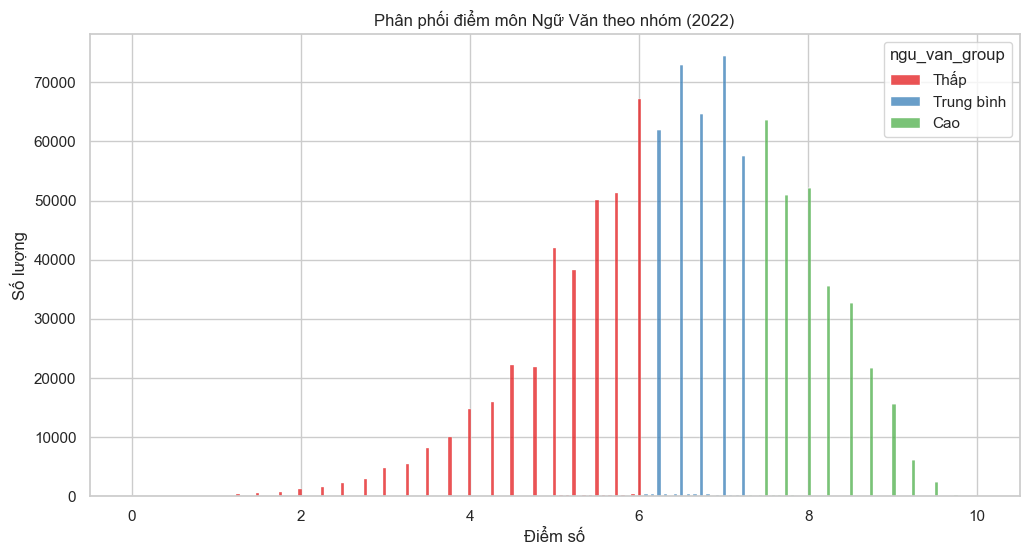

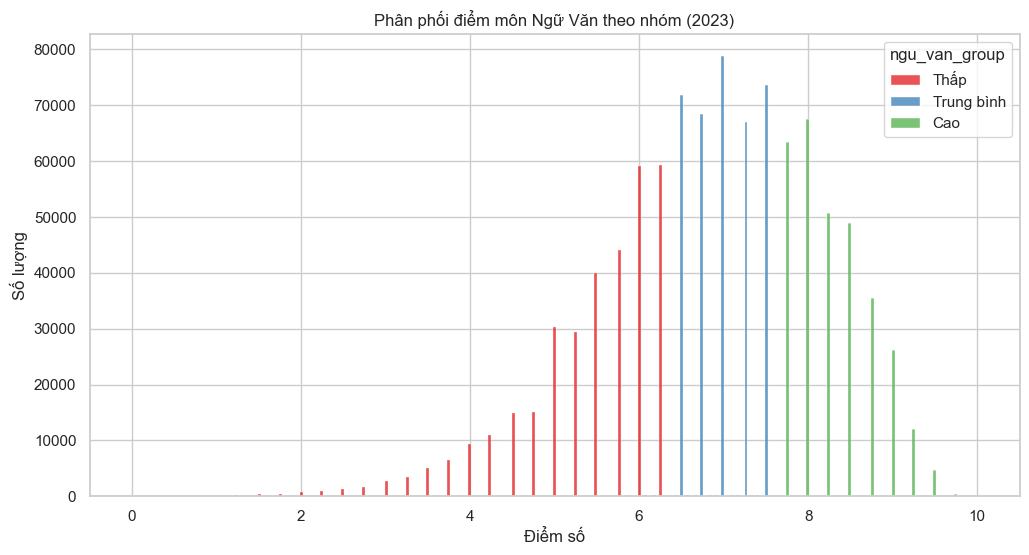

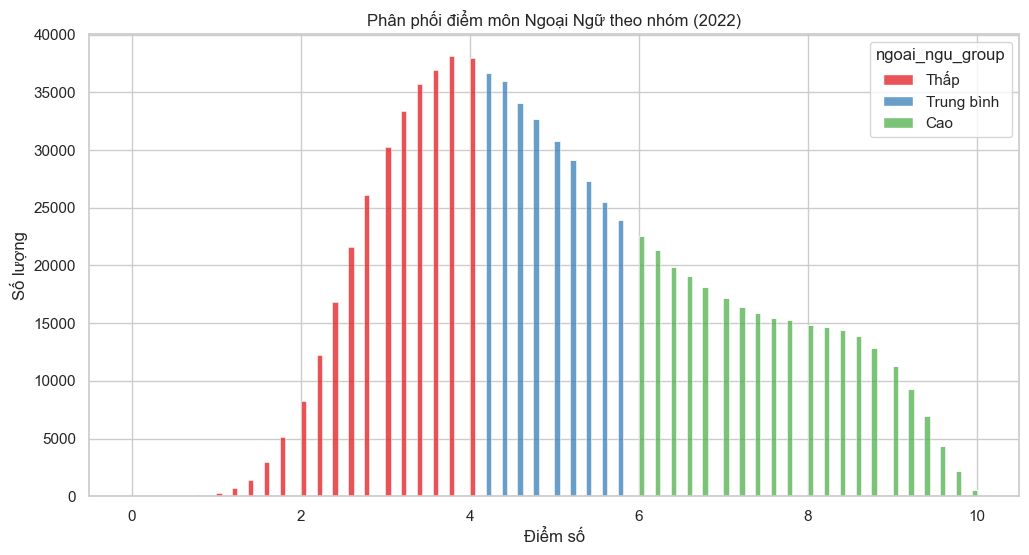

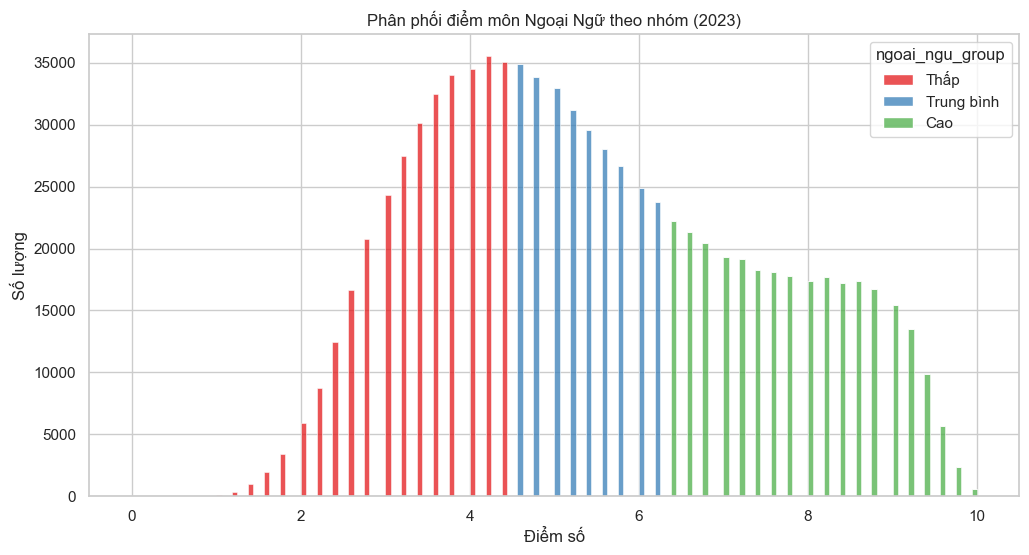

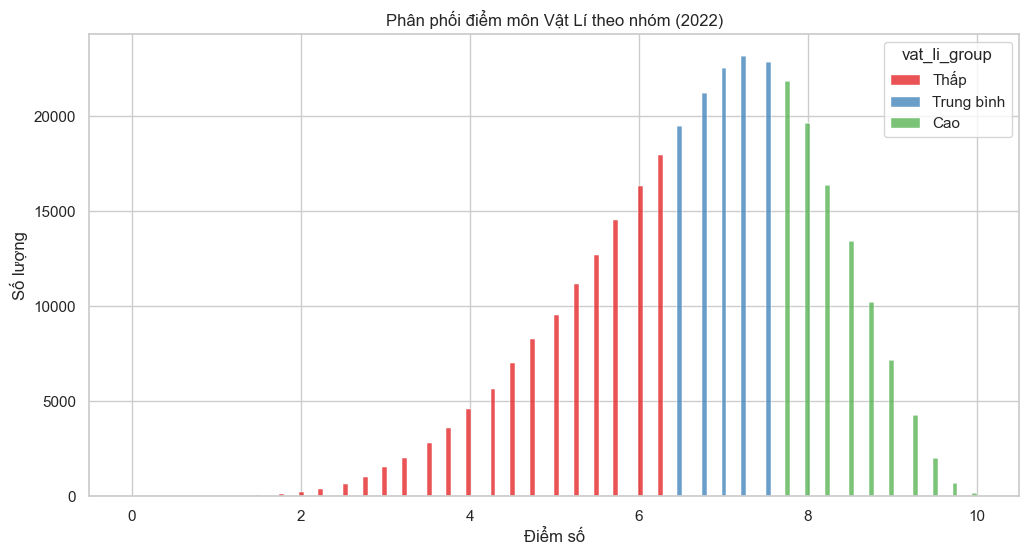

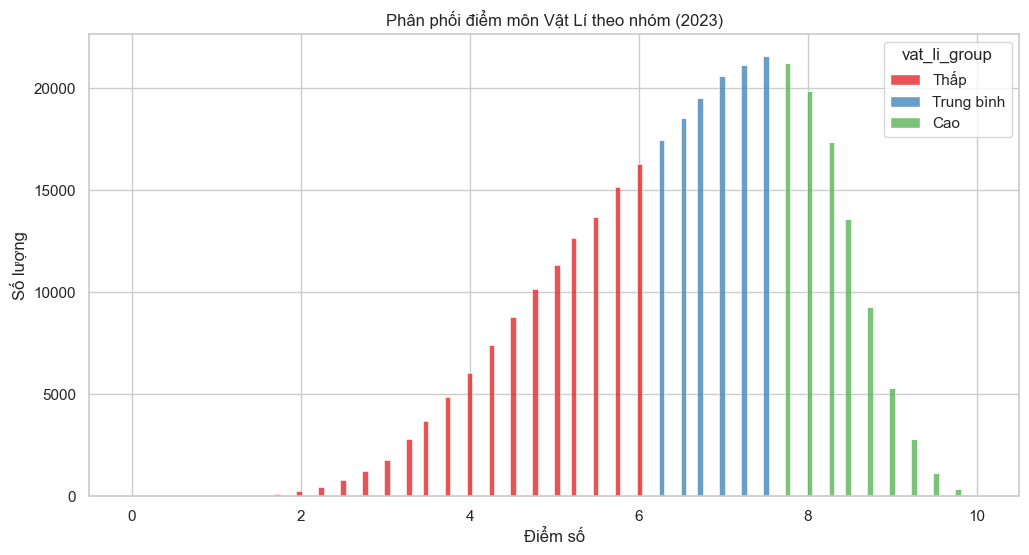

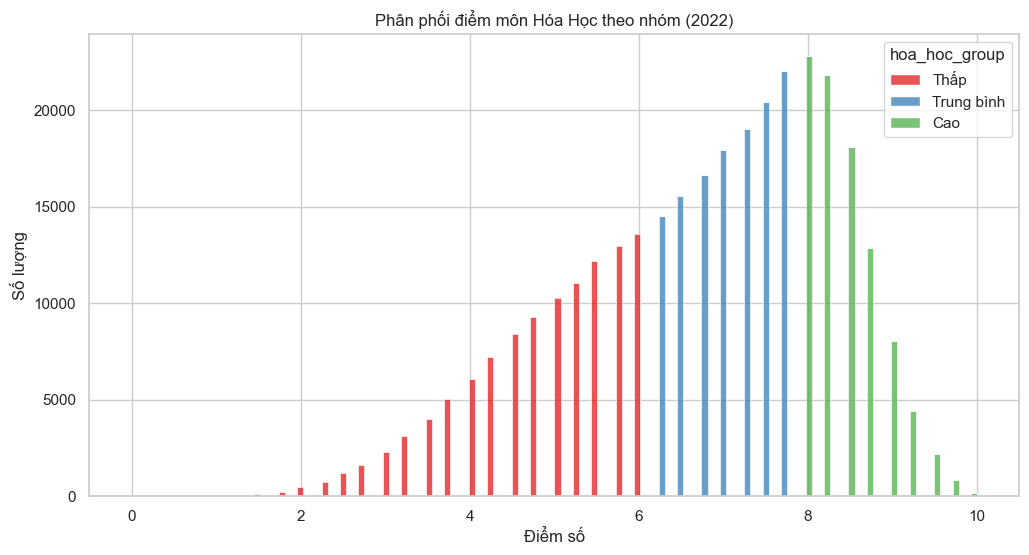

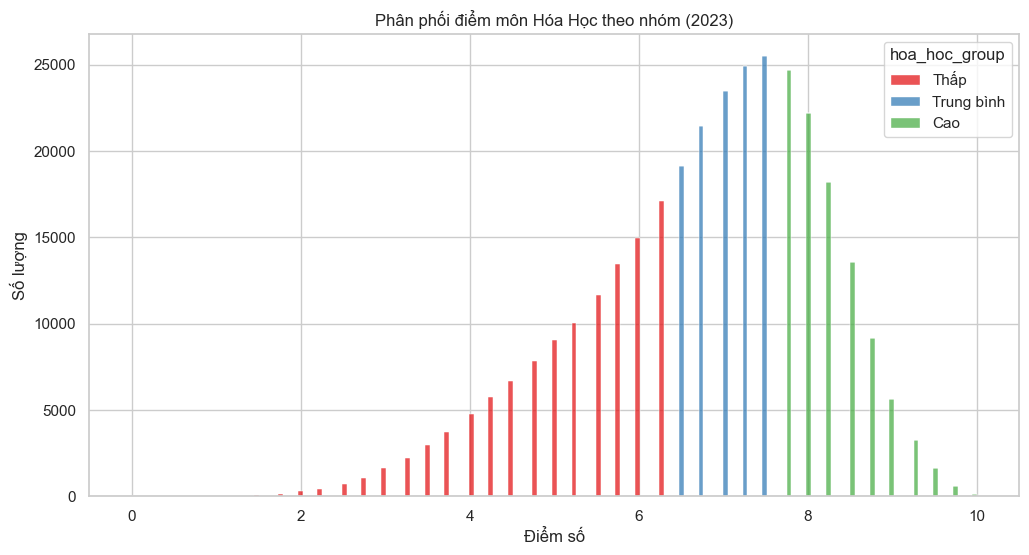

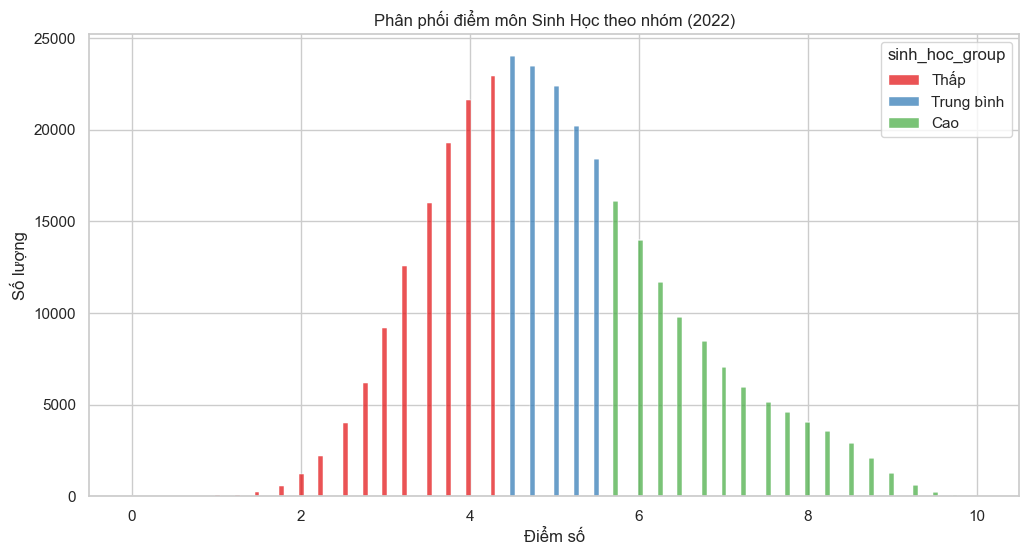

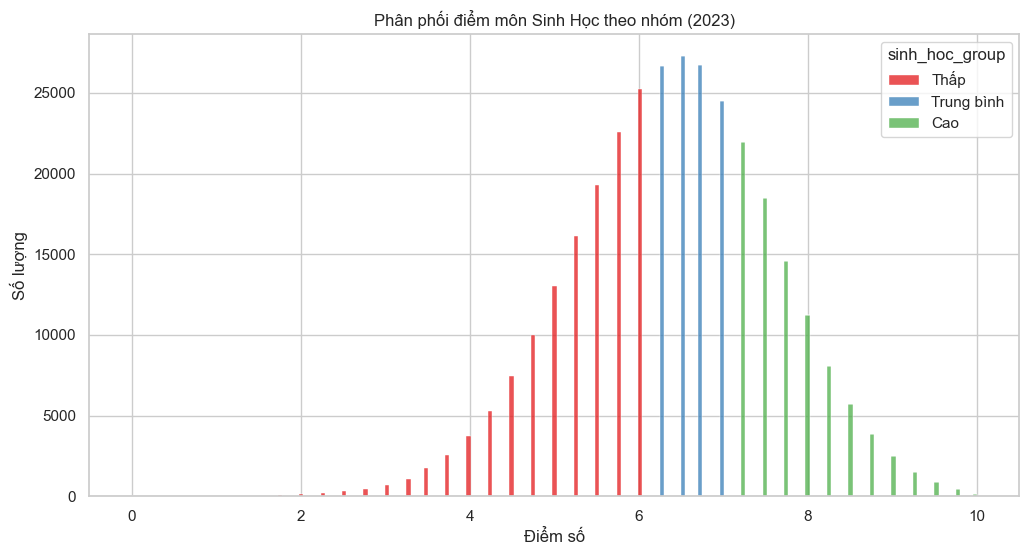

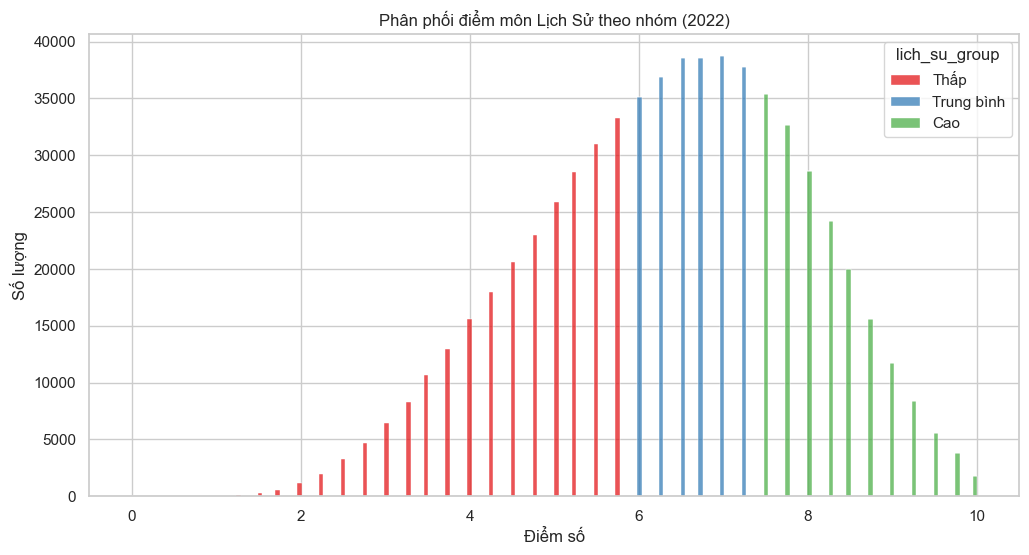

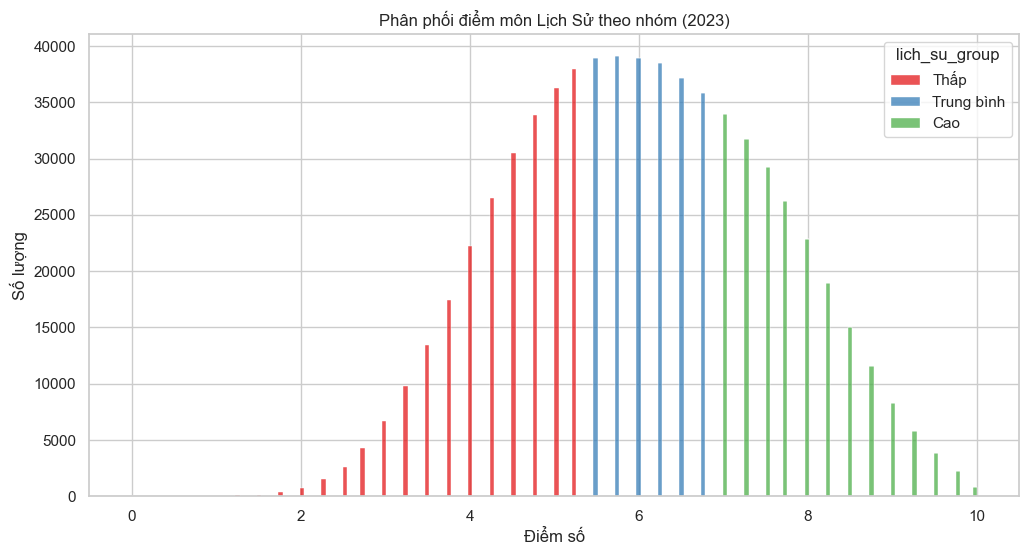

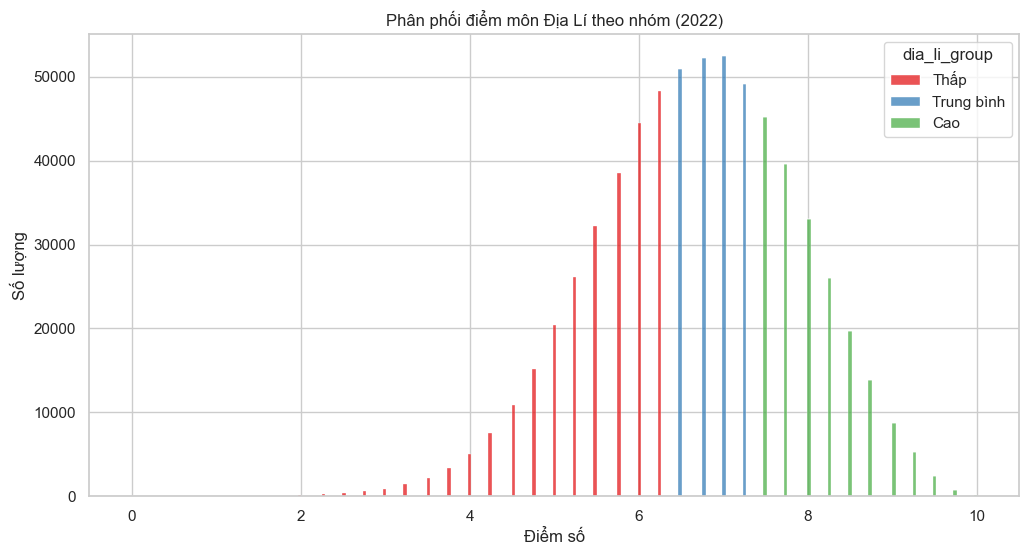

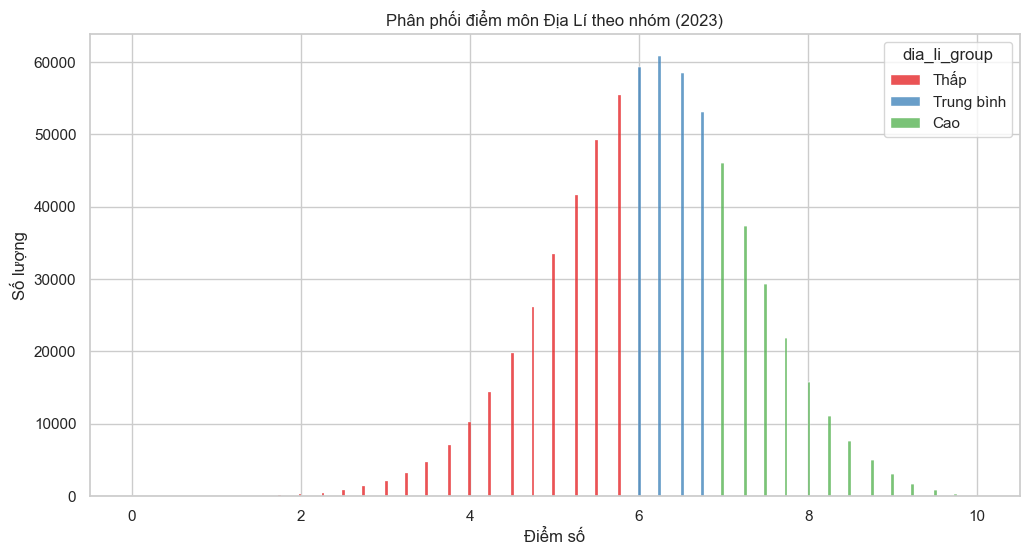

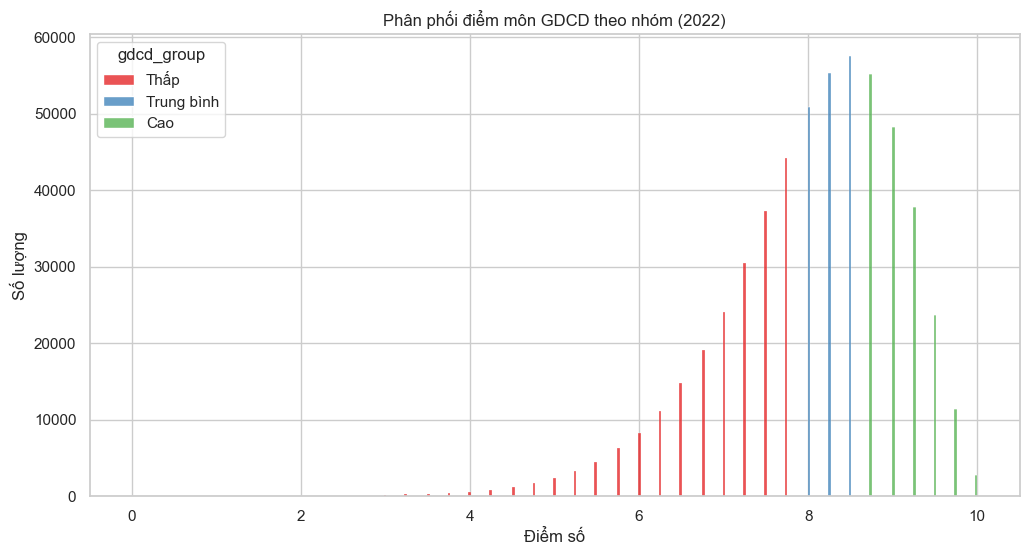

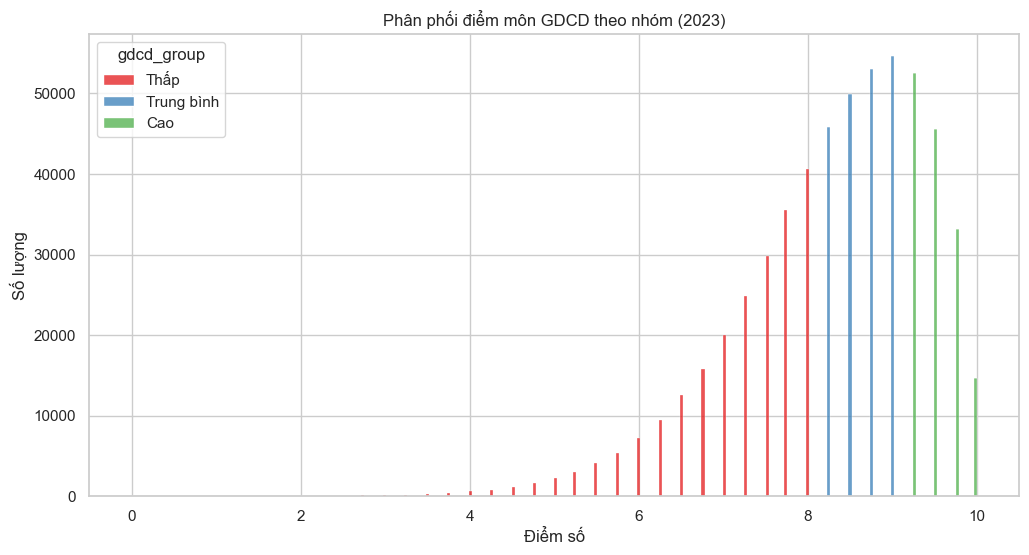

In [24]:
# Vẽ biểu đồ phân phối điểm theo các nhóm
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

for subject in subjects:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_2022, x=subject, hue=f'{subject}_group', multiple="stack", palette='Set1')
    plt.title(f'Phân phối điểm môn {subject_map[subject]} theo nhóm (2022)')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.savefig(f'{path_img}/grouped_distribution_{subject}_2022.png')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(df_2023, x=subject, hue=f'{subject}_group', multiple="stack", palette='Set1')
    plt.title(f'Phân phối điểm môn {subject_map[subject]} theo nhóm (2023)')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.savefig(f'{path_img}/grouped_distribution_{subject}_2023.png')
    plt.show()

### So sánh phân phối điểm tổ hợp môn theo các nhóm (cao, trung bình, thấp)

In [25]:
def categorize_scores_combo(df):
    combos = ['A00', 'A01', 'B00', 'C00', 'D01']
    for combo in combos:
        df[f'{combo}_group'] = pd.qcut(df[combo], 3, labels=['Thấp', 'Trung bình', 'Cao'])
    return df

df_2022 = categorize_scores_combo(df_2022)
df_2023 = categorize_scores_combo(df_2023)

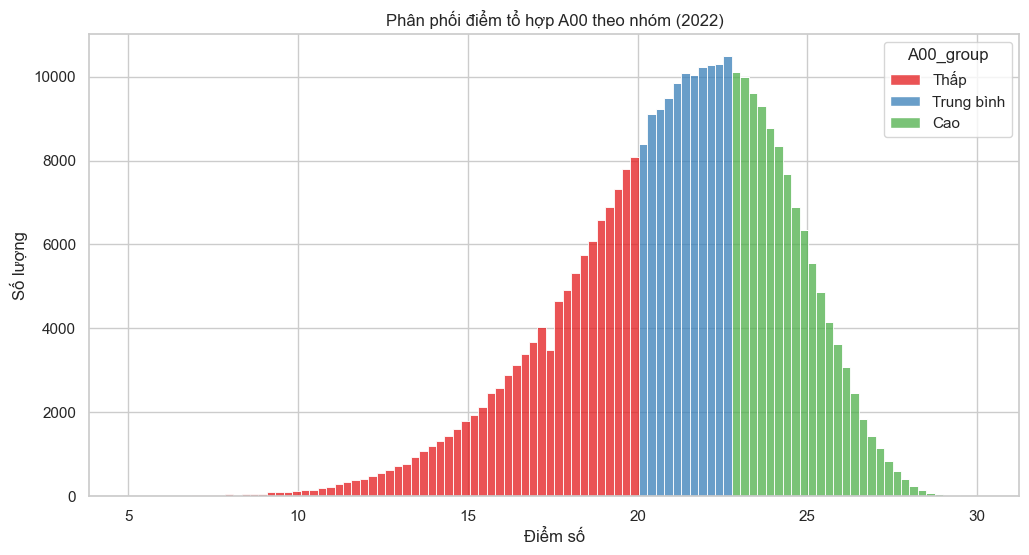

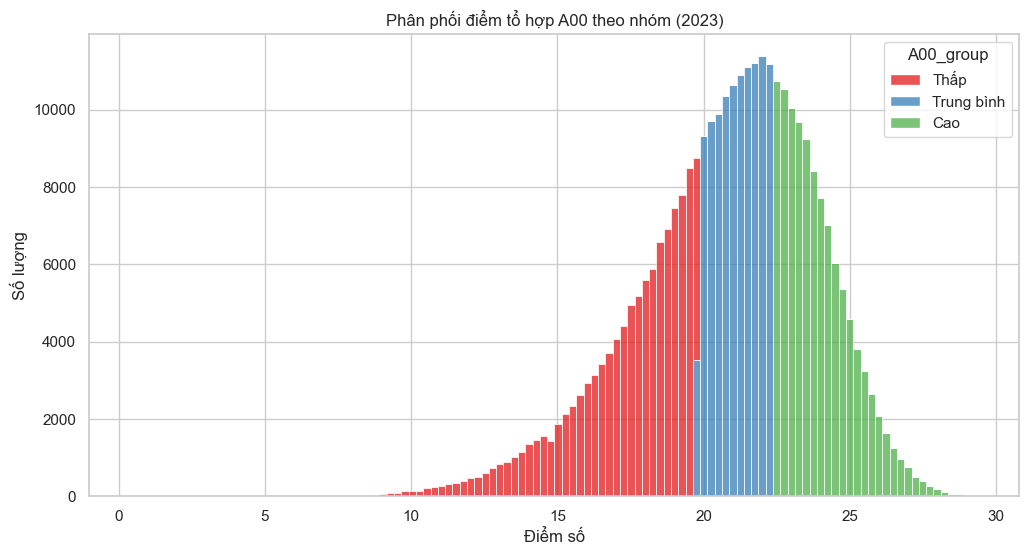

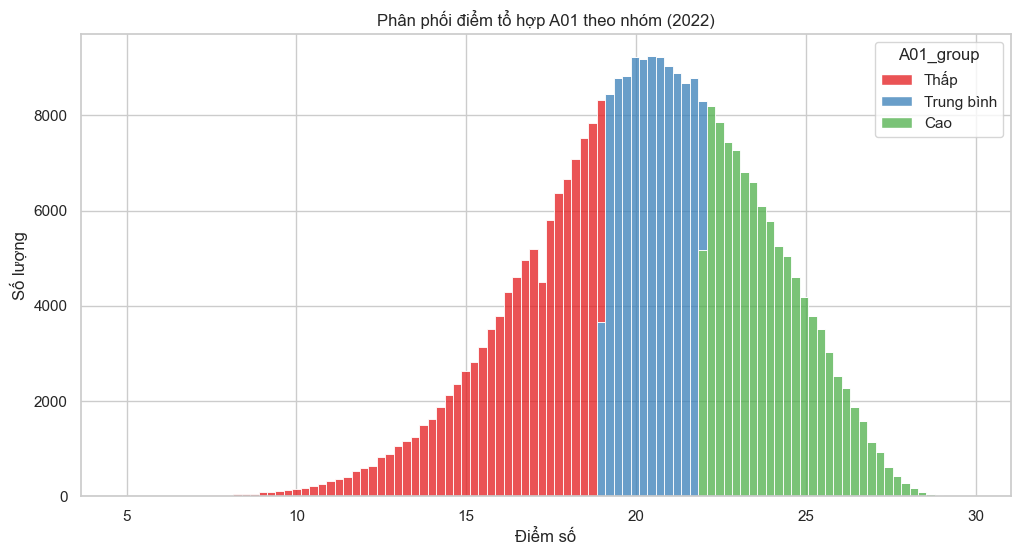

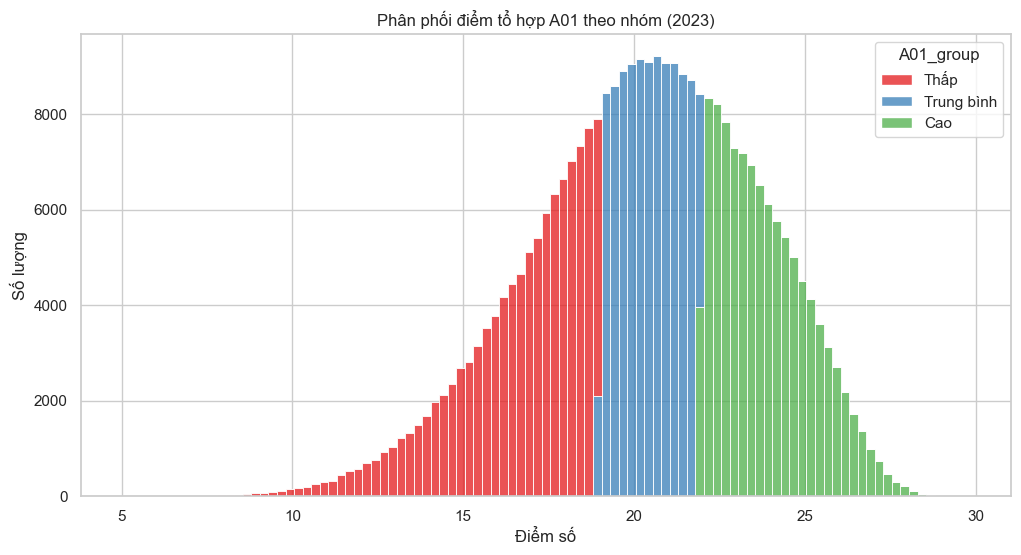

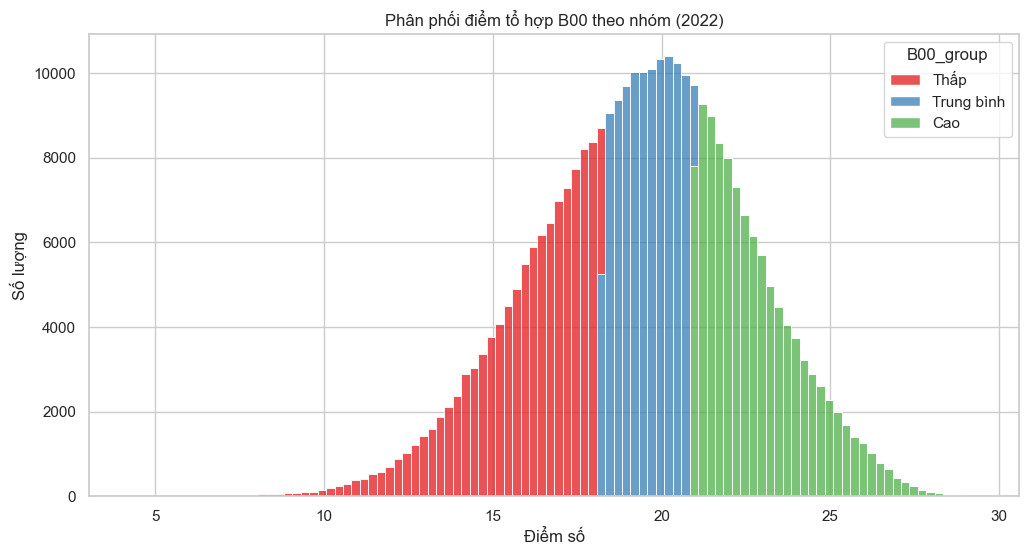

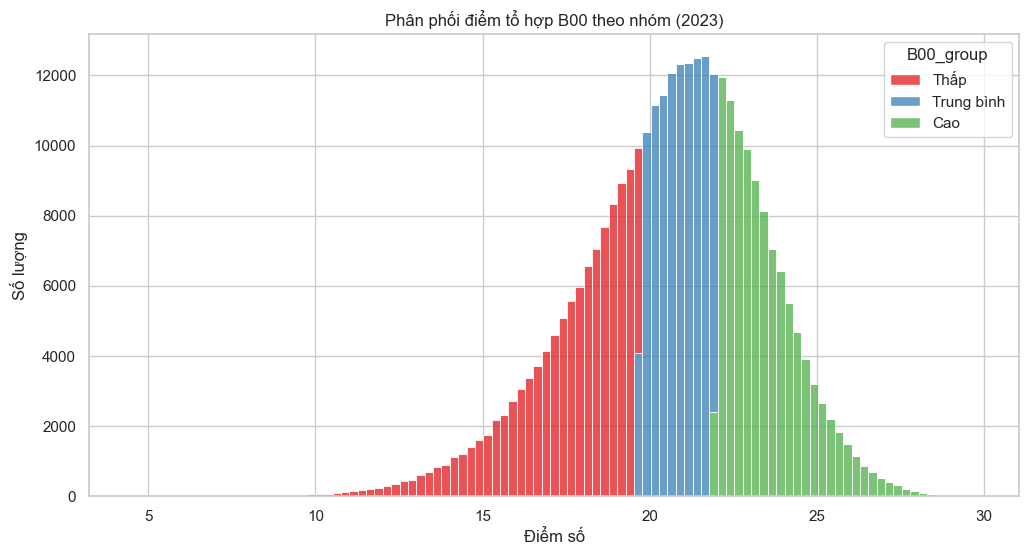

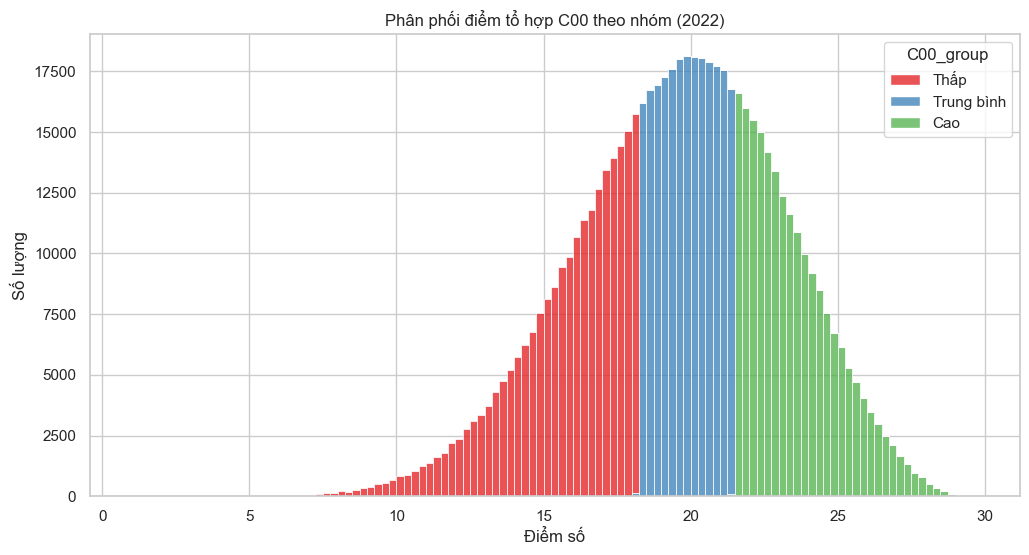

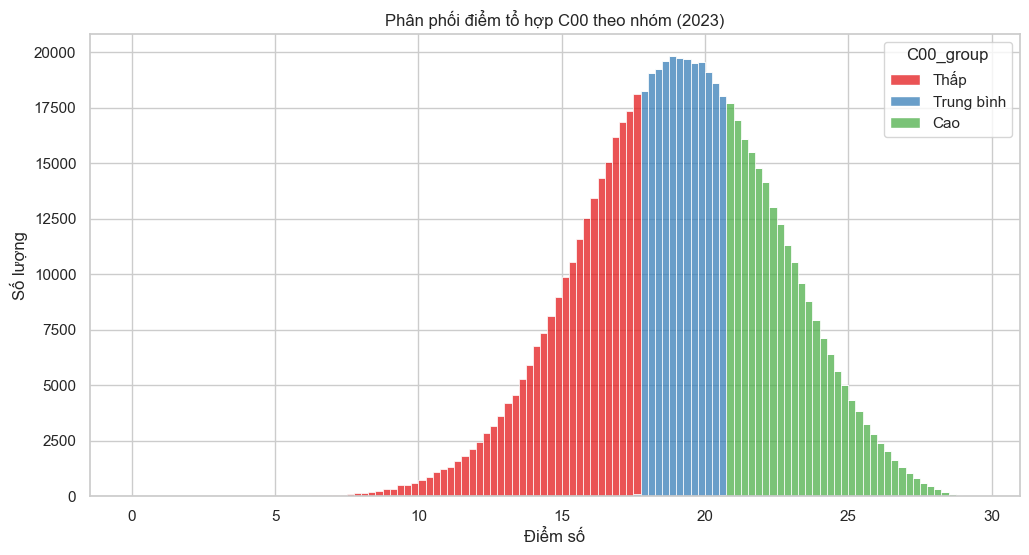

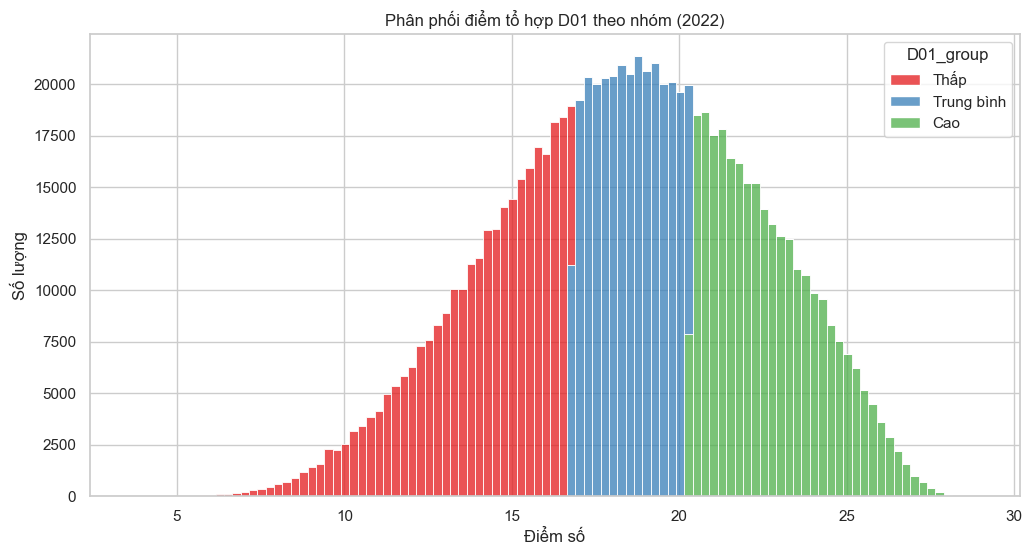

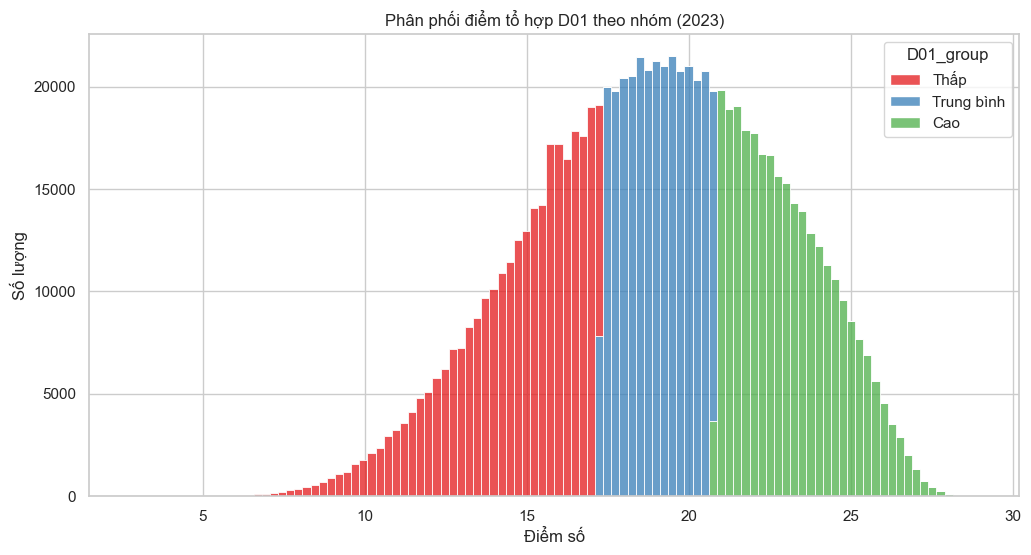

In [26]:
# Vẽ biểu đồ phân phối điểm theo các nhóm
combos = ['A00', 'A01', 'B00', 'C00', 'D01']

for combo in combos:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_2022, x=combo, hue=f'{combo}_group', multiple="stack", palette='Set1', binwidth=0.25)
    plt.title(f'Phân phối điểm tổ hợp {combo} theo nhóm (2022)')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.savefig(f'{path_img}/grouped_distribution_{combo}_2022.png')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(df_2023, x=combo, hue=f'{combo}_group', multiple="stack", palette='Set1', binwidth=0.25)
    plt.title(f'Phân phối điểm tổ hợp {combo} theo nhóm (2023)')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.savefig(f'{path_img}/grouped_distribution_{combo}_2023.png')
    plt.show()